# WEDAP Figures

---
**WEDAP** : **W**eighted **E**nsemble **D**ata **A**nalysis and **P**lotting (pronounced we-dap)
<p>
    <img src="wedap_logo2.png" alt="wedap logo" width="200" align="left">
</p>

This notebook is a more bare-bones (less explanations) example of how the figures for the `WEDAP` paper were created. More details about the plots can be found in the actual paper. 

For general examples and explanations, see the [wedap demo jupyter notebook](https://github.com/darianyang/wedap/blob/main/docs/notebook/wedap_demo.ipynb). Note there is some similarity with the examples in the demo notebook and some of the examples in this notebook.

The format of the notebook will be to demonstrate creating each plot separately using the CLI (if available) and the Python API.

### TODO:
* should the figure be how many panels? Prob can fit 4 rows and 3 columns so 12. Or maybe 9 if the caption is long. But sometimes the caption is on a different page in those cases so maybe it's fine?
* maybe have first row of figure be the CLI/API/GUI? hmmm not sure, maybe it's fine in SI.

In [1]:
import wedap
import matplotlib.pyplot as plt

In [2]:
# optionally apply default wedap matplotlib style sheet
plt.style.use("default.mplstyle")

### Example 1: Evolution Plot

This is a classic plot of the evolution of a WE simulation, plotting the probability distribution on the X axis as you progress through each iteration of the WE simulation on the Y axis. The colorbar is showing the probability values of each bin in the histogram. The probability values are derived from the raw data count values of the multiple segments in each WE iteration in the west.h5 file, weighted by each segment weight. This weighted histogram is normalized and shown on an inverted natural log scale: $-\ln(\frac{P(x)}{P(max)})$

```
$ wedap -W west.h5 --data-type evolution --xlabel "Heavy Atom RMSD ($\AA$)"
```

Evolution:   0%|          | 0/200 [00:00<?, ?it/s]

Text(15.472222222222225, 0.5, 'WE Iteration')

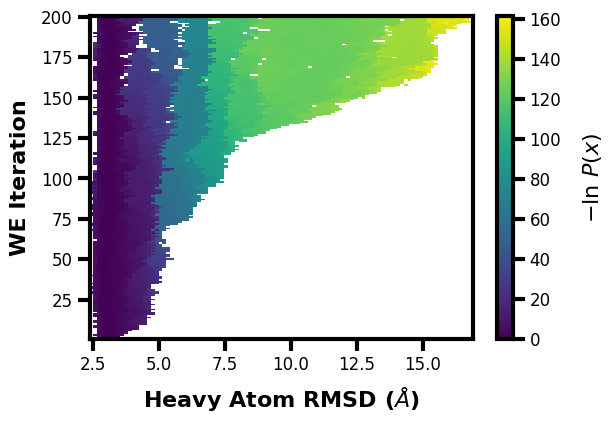

In [33]:
wedap.H5_Plot(h5="west.h5", data_type="evolution").plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("WE Iteration")

### Example 2: 1D Probability Distribution

You can also make simple 1D plots for a single iteration `--data-type instant` || `data_type='instant'` or for the average of a range of iterations `--data-type average` || `data_type='average'`. Here we show the average probability distribution for the entire range of WE iterations in the input `west.h5` file.

```
$ wedap -W west.h5 -dt average --plot-mode line --xlabel "Heavy Atom RMSD ($\AA$)"
```

Average 1D:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, -1.7777777777777821, 'Heavy Atom RMSD ($\\AA$)')

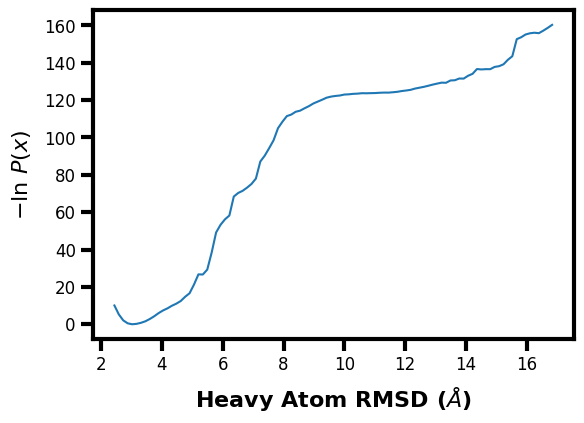

In [17]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="line").plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")

### Example 3: 2D Probability Distribution (TODO: contour plot?)

We can also make probability distributions using two datasets, first we can try this with just our two dimensional progress coordinates. Note that you can set the progress coordinate or any aux dataset index using `Xindex`, `Yindex`, and `Zindex`. This can be useful for multi-dimensional progress coordinates, but also for multi-dimensional auxiliary data.

```
$ wedap -W west.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average  \
        -y pcoord -yi 1 --ylabel "Radius of Gyration ($\AA$)"
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

Text(25.972222222222225, 0.5, 'Radius of Gyration ($\\AA$)')

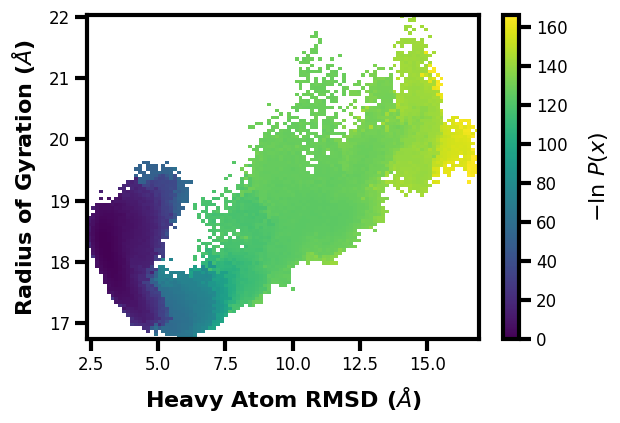

In [18]:
wedap.H5_Plot(h5="west.h5", data_type="average", Xindex=0, Yname="RoG", Yindex=0).plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Radius of Gyration ($\AA$)")

### Example 4: 3D Scatter Plot

What if you don't want to show the probability axis? Well, you can also just show how three different datasets are related in a 3D scatter plot. Here we can put two different aux datasets on the X and Y axes and we can set the colorbar to show the progress coordinate values in comparison:

```
$ wedap -W west.h5 --xlabel "Radius of Gyration ($\AA$)" -x RoG  -dt average  -y Total_SASA --ylabel "SASA ($\AA^2$)" -z pcoord --cbar-label "Heavy Atom RMSD ($\AA$)" -pm scatter3d -scatter-interval 10 --scattter-size 1
```

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

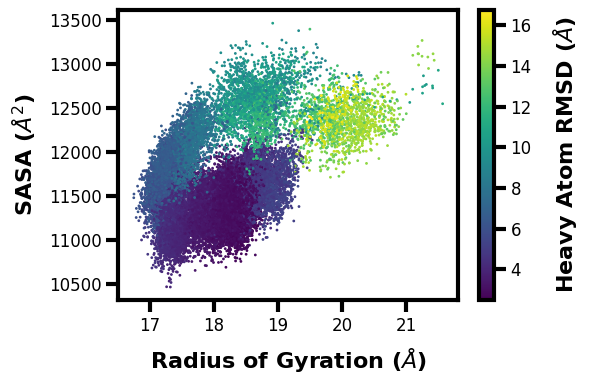

In [31]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="scatter3d", 
              Xname="RoG", Yname="Total_SASA", Zname="pcoord",
              cbar_label="Heavy Atom RMSD ($\AA$)", scatter_interval=10, scatter_size=1,
              xlabel="Radius of Gyration ($\AA$)", ylabel="SASA ($\AA^2$)").plot()

### Example 5: 3D Hexbin Plot

We can make a similar 3D plot using hexbins.

```
$ wedap -W west.h5 --xlabel "Radius of Gyration ($\AA$)" -x RoG  -dt average  -y Total_SASA --ylabel "SASA ($\AA^2$)" -z pcoord --cbar-label "Heavy Atom RMSD ($\AA$)" -pm hexbin3d -hexbin-grid 100
```

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

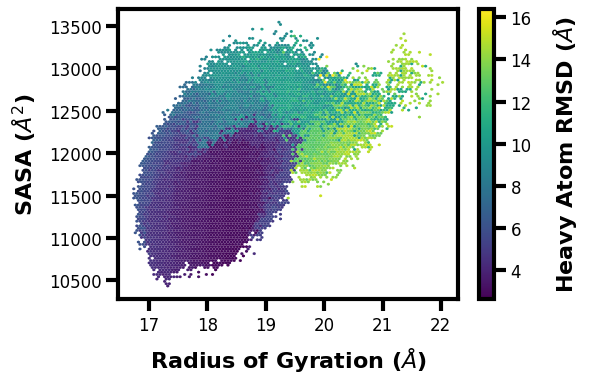

In [29]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="hexbin3d", 
              Xname="RoG", Yname="Total_SASA", Zname="pcoord",
              cbar_label="Heavy Atom RMSD ($\AA$)", hexbin_grid=100,
              xlabel="Radius of Gyration ($\AA$)", ylabel="SASA ($\AA^2$)").plot()

### Example 6: Joint Plot with Multiple Extra Features

Here, I want to demonstrate some of the additional features available by making a more complicated joint plot. This is using a contour plot instead of a histogram, as set by `--plot-mode contour` || `plot_mode='contour'`, there is also custom colormapping (`--cmap`), probability units (`--p-units`), iteration ranges (`--first-iter`, `--last-iter`), probability limits (`--pmin`, `--pmax`), plot style (`--style`), data smoothing (`--smoothing-level`), and plot limits (`--xlim`, `--ylim`).


Available `--plot-mode` || `plot_mode` options:
* `line` -- plot 1D lines.
* `hist` -- plot histogram (default).
* `hist_l` -- plot histogram and contour lines.
* `contour` -- plot contour levels and lines.
* `contour_f` -- plot contour levels only.
* `contour_l` -- plot contour lines only.
* `scatter3d` -- plot 3 datasets in a scatter plot.

```
$ wedap -W p53.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -xi 0  -dt average  -y dihedral_11 --ylabel "Dihedral 11 ($\degree$)" --joint-plot -pm contour_f --cmap gnuplot_r --style ggplot --p-units kcal --first-iter 3 --last-iter 15 --pmin 1 --pmax 10 --smoothing-level 1 --xlim -1 7 --ylim -180 180
```

Average 2D:   0%|          | 0/198 [00:00<?, ?it/s]

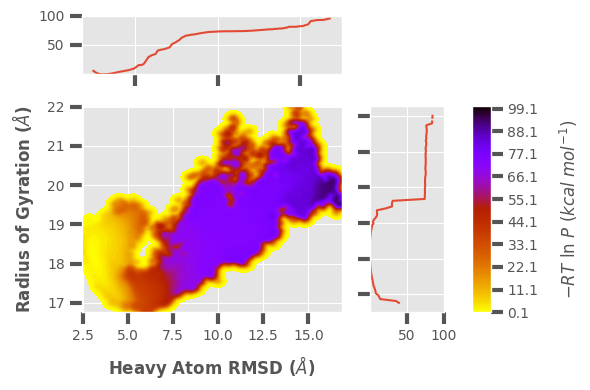

In [42]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "contour_f", 
                #"color" : "k",
                "Xname" : "pcoord", 
                "Yname" : "RoG", 
                "cmap" : "gnuplot_r",
                "jointplot" : True, 
                "p_units" : "kcal",
                "first_iter" : 3, 
                "last_iter" : 200, 
                "p_min" : 0.1, 
                "p_max" : 100,
                "smoothing_level" :1,
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                #"xlim" : (1, 17.5),
                #"ylim" : (16, 23),
                }
plt.style.use("ggplot")
wedap.H5_Plot(**plot_options).plot()

# save the resulting figure
#plt.tight_layout()
#plt.savefig("wedap_jp.pdf")

In [52]:
# change style back to wedap default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("default.mplstyle")

### Example 7: 3D Contour Plot ?

```
$ wedap -h5 west.h5 -dt average -pm contour -X pcoord -Y RoG --cmap gnuplot_r -3d
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

/Users/darian/github/wedap/wedap/h5_plot.py:268: UserWarning: With 'contour' plot_type, p_max should be set. Otherwise max Z is used.
  warn("With 'contour' plot_type, p_max should be set. Otherwise max Z is used.")


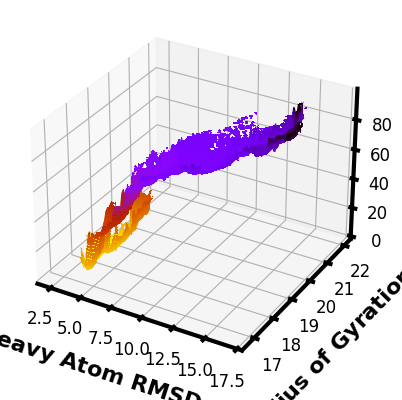

In [3]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "contour", 
                #"color" : "k",
                "Xname" : "pcoord", 
                "Yname" : "RoG", 
                "cmap" : "gnuplot_r",
                "zlabel" : "-RT ln(P) (kcal/mol)",
                "p_units" : "kcal",
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                #"xlim" : (1, 17.5),
                #"ylim" : (16, 23),
                "proj3d" : True,
                }
wedap.H5_Plot(**plot_options).plot()
plt.tight_layout()
plt.show()

### Example 8: 4D Scatter Plot ?

```
$ wedap -h5 docs/paper_figures/west.h5 -dt average -pm scatter3d -X pcoord -Y RoG --cmap gnuplot_r -4d -Z Total_SASA -C Num_Inter_NC
```

Data 4D:   0%|          | 0/200 [00:00<?, ?it/s]

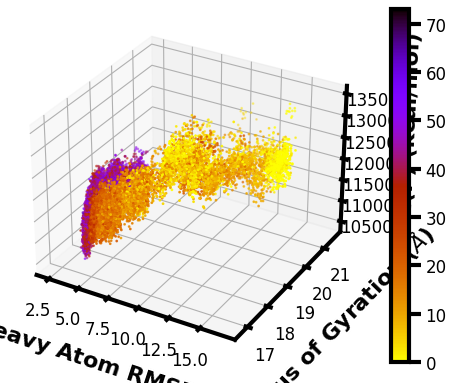

In [8]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "scatter3d", 
                #"color" : "k",
                "Xname" : "pcoord", 
                "Yname" : "RoG",
                "Zname" : "Total_SASA",
                "Cname" : "Num_Inter_NC",
                "cmap" : "gnuplot_r",
                "zlabel" : "-RT ln(P) (kcal/mol)",
                "p_units" : "kcal",
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                #"xlim" : (1, 17.5),
                #"ylim" : (16, 23),
                "proj4d" : True,
                }
wedap.H5_Plot(**plot_options).plot()
plt.tight_layout()
plt.show()

### other examples? succ_only?, bstate_filters?

## Advanced WEDAP examples

---

### Example 1: Multi-panel Probability Distributions

### Example 2: Multiple Datasets on One Plot

We can also directly compare multiple aux or pcoord datasets on a single axis.

If we wanted to, mdap could then be used to compare standard MD data to WE data.

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

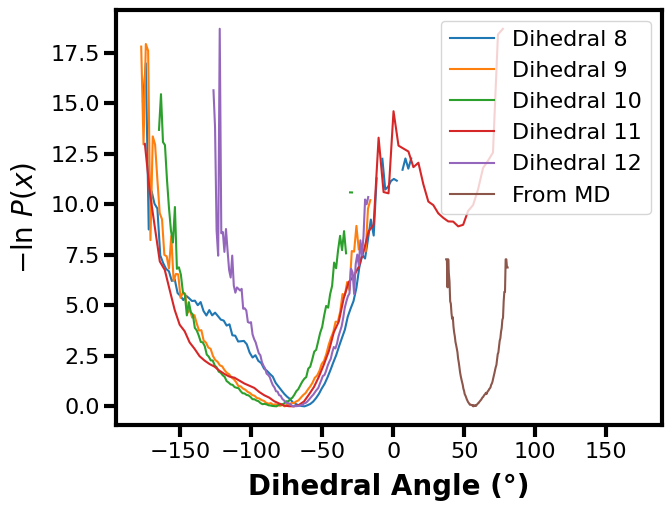

In [50]:
import mdap

fig, ax = plt.subplots()

for i in range(8, 13):
    wedap.H5_Plot(h5="p53.h5", data_type="average", ax=ax, plot_mode="line",
                  Xname=f"dihedral_{i}", data_label=f"Dihedral {i}").plot()

# extra line needed to also plot the standard MD distribution data
mdap.MD_Plot(Xname="c_angle.dat", data_type="pdist", plot_mode="line",  
             data_label="From MD", ax=ax).plot()

ax.set_xlabel("Dihedral Angle (°)")
plt.legend()
plt.show()

But keep in mind that this example doesn't make too much sense because the datasets between standard MD and WE are for different systems and metrics. Ideally, you could use this framework to compare the same calculation for the same system to see how (hopefully) the WE simulation was able to explore the landscape better than standard MD.

In [51]:
# save the resulting figure
fig.tight_layout()
fig.savefig("multi-aux-1d-w-md.pdf")

### Example comparing to MD in 2D pdist? NMR vs XTAL RMSD?

### Example 3: Tracing Trajectories (TODO: multiple traces on one plot) (hexbin trace with multiple traces?)

We often want to see how a single continuous trajectory evolves as the WE simulation progresses. 

If we want to trace the path to get to iteration 18 and segment 1:

```
$ wedap -W p53.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average  \
        -y dihedral_11 --ylabel "Dihedral 11 ($\degree$)" --trace-seg 18 1
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

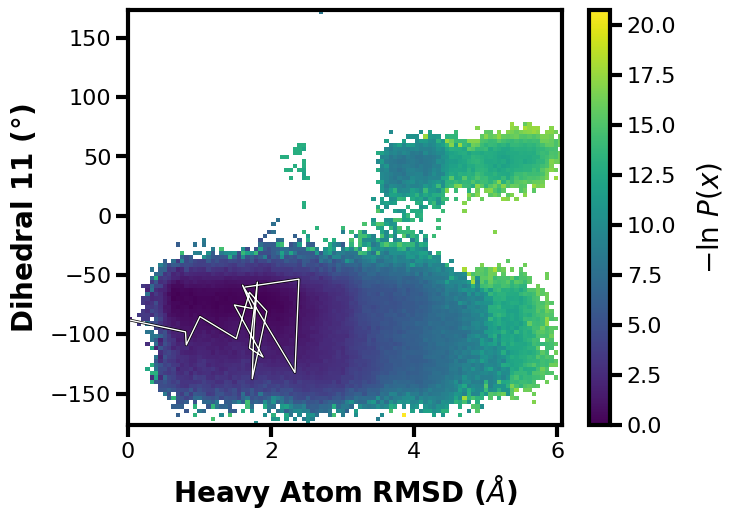

In [52]:
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=0, Yname="dihedral_11")
wedap_obj.plot()
wedap_obj.plot_trace((18,1), ax=wedap_obj.ax)
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Dihedral 11 ($\degree$)")
plt.show()

In [53]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("trace-seg.pdf")

Or we can trace by values, let's say we want to find a walker that goes to a pcoord value of 5.8 and an aux value of 50:

```
$ wedap -W p53.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average  \
        -y dihedral_11 --ylabel "Dihedral 11 ($\degree$)" --trace-val 5.8 50
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Go to ITERATION: 19 and SEGMENT: 331


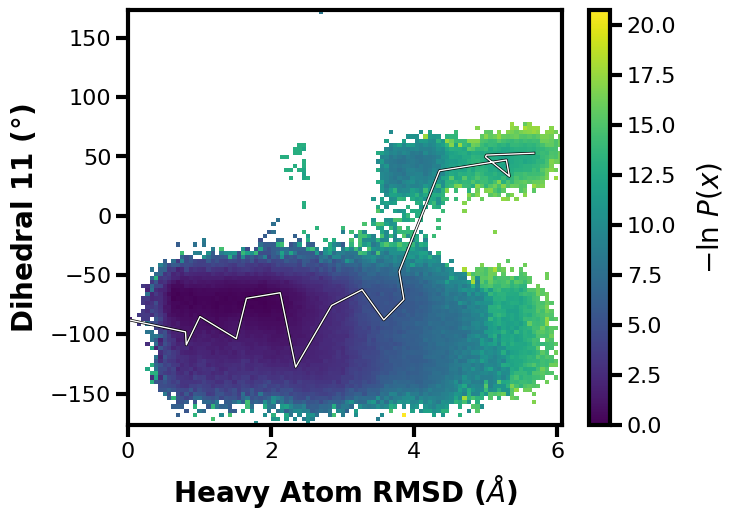

In [56]:
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=0, Yname="dihedral_11")
wedap_obj.plot()
iter, seg = wedap_obj.search_aux_xy_nn(5.8, 50)
wedap_obj.plot_trace((iter, seg), ax=wedap_obj.ax)
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Dihedral 11 ($\degree$)")
plt.show()

We also get an output line of which iteration and segment the trace corresponds to.

In [57]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("trace-val.pdf")

### Example 4: Making a GIF

Let's now make a GIF of our data, here I am using the dihedral 11 aux dataset and looping through the averages of small sets of iteration ranges, but anything could be looped to make the GIF using this example as a template.

In [58]:
import gif

In [66]:
# for a progress bar
from tqdm.auto import tqdm

In [59]:
# plots should not be saved with any transparency
import matplotlib as mpl
mpl.rcParams["savefig.transparent"] = False
mpl.rcParams["savefig.facecolor"] = "white"

In [67]:
# decorate a plot function with @gif.frame (return not required):
@gif.frame
def plot(iteration, avg_plus=100):
    """
    Make a gif of multiple wedap plots.

    Parameters
    ----------
    iteration : int
        Plot a specific iteration.
    avg_plus : int
        With an average plot, this is the value added to iteration.
    """
    plot_options = {"h5" : "p53.h5",
                    "Xname" : "pcoord",
                    "Yname" : "dihedral_11",
                    "data_type" : "average",
                    "p_max" : 12,
                    "p_units" : "kcal",
                    "first_iter" : iteration,
                    "last_iter" : iteration + avg_plus,
                    "plot_mode" : "hist",
                    "ylabel" : "Dihedral Angle 11 (°)",
                    "xlabel" : "Heavy Atom RMSD ($\AA$)",
                    "title" : f"WE Iteration {iteration} to {iteration + avg_plus}",
                    "xlim" : (0, 6),
                    "ylim" : (-180, 180),
                    "grid" : True,
                    "cmap" : "gnuplot_r",
                    "no_pbar" : True,
                    }
    
    we = wedap.H5_Plot(**plot_options)
    we.plot()

# build a bunch of "frames"
# having at least 100 frames makes for a good length gif
frames = []
# set the range to be the iterations at a specified interval
for i in tqdm(range(1, 19)):
    frame = plot(i, avg_plus=2)
    frames.append(frame)

# specify the duration between frames (milliseconds) and save to file:
gif.save(frames, "example.gif", duration=50)

  0%|          | 0/18 [00:00<?, ?it/s]

The resulting GIF is shown below:

<p align="left">
    <img src="example.gif" alt="example gif" width="400" align="left">
</p>

### Example 5: Data Extraction for Machine Learning with scikit-learn (TODO: cluster the PCs?)

In this final example, I will go through how to extract data from a `west.h5` file using `wedap` and then we can directly pass the data to other Python libraries such as `scikit-learn` to do some clustering and pca.

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

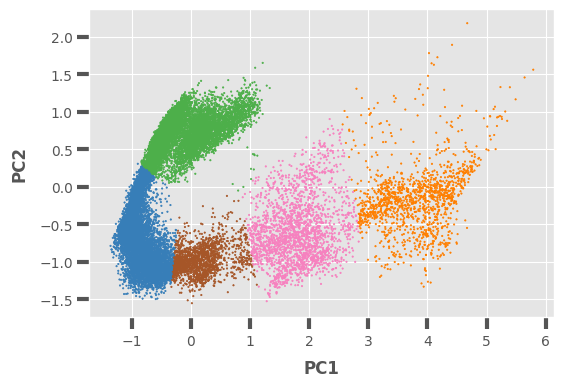

In [51]:
# load h5 file into pdist class
data = wedap.H5_Pdist("west.h5", data_type="average")

# extract weights
weights = data.get_all_weights()

# extract data arrays (can be pcoord or any aux data name)
X = data.get_total_data_array("pcoord", 0)
Y = data.get_total_data_array("RoG", 0)

# put X and Y together column wise
XY = np.hstack((X,Y))

# scale data
scaler = StandardScaler()
XY = scaler.fit_transform(XY)

# use 10x less data for easier plotting
XY = XY[::10,:]

# -ln(W/W(max)) weights
weights_expanded = -np.log(weights/np.max(weights))[::10]

# cluster pdist using weighted k-means
clust = KMeans(n_clusters=5).fit(XY, sample_weight=weights_expanded)

# create plot base
fig, ax = plt.subplots()

# get color labels
cmap = np.array(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628"])
colors = [cmap[label] for label in clust.labels_.astype(int)]

# plot on PCs
pca = PCA(n_components=2)
PCs = pca.fit_transform(XY)
ax.scatter(PCs[:,0], PCs[:,1], c=colors, s=1)

# labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

In [65]:
# save the resulting figure
fig.tight_layout()
fig.savefig("km_pca.pdf")

Now we have a plot along the first two principal components with cluster labels as the colors. Note that this isn't necessarily the most rigorous example, but more of a demonstration of how to use `wedap` with a library like `sklearn`.